# Custemer Segmentation Using Kmeans Clustering 

In [1]:
## Step 1   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Step 2 import data

In [3]:
df = pd.read_csv(r'C:\Users\Abhijeet Rane\Downloads\Mall_Customers.csv', index_col=0 , header = 0 )

In [4]:
pwd

'C:\\Users\\Abhijeet Rane\\Desktop\\ML_Projects\\K-Means'

In [5]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


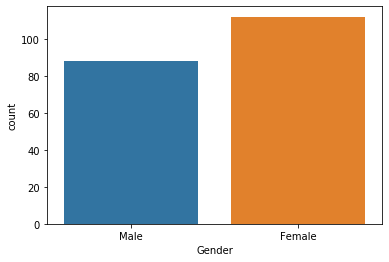

In [6]:
# Count plot on single categorical variable 
sns.countplot(x = 'Gender', data = df)
#show the plot
plt.show()

In [7]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

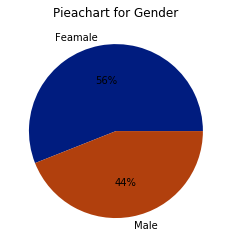

In [8]:
# declaring data 
data = [112, 88]
keys = ['Feamale', 'Male']

#declaring exploding pie
explode =[0,0]

#define seaborn color palette to use 
palette_color = sns.color_palette('dark')

#plotting data on chart
plt.pie(data , labels=keys , colors=palette_color,explode=explode, autopct='%.0f%%')

plt.title("Pieachart for Gender")


#displayig chart
plt.show()

In [9]:
sns.__version__

'0.11.2'

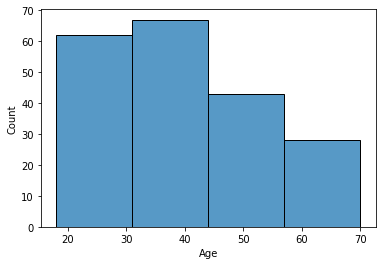

In [10]:
sns.histplot(data = df,
            x="Age",
            bins=4,
            kde = False )

plt.show()

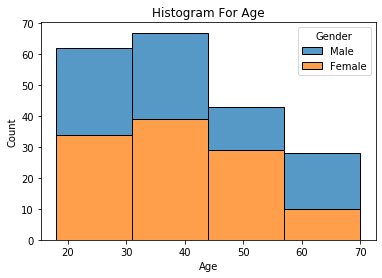

In [11]:
sns.histplot(data = df,
            x="Age",
            bins=4,
            hue="Gender",
            multiple ="stack",
            kde = False )
plt.title("Histogram For Age")
plt.show()

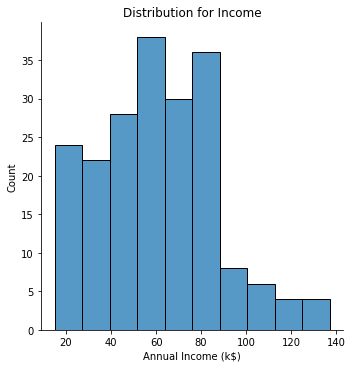

In [12]:
sns.displot(df, x="Annual Income (k$)")
plt.title("Distribution for Income")
plt.show()

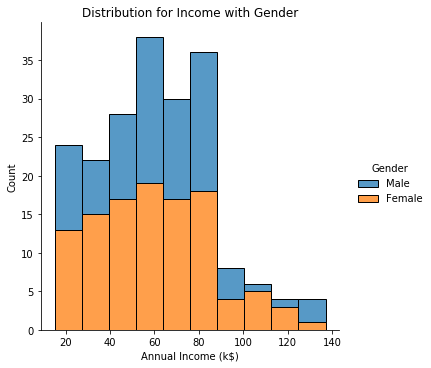

In [13]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", multiple ="stack")
plt.title("Distribution for Income with Gender")
plt.show()

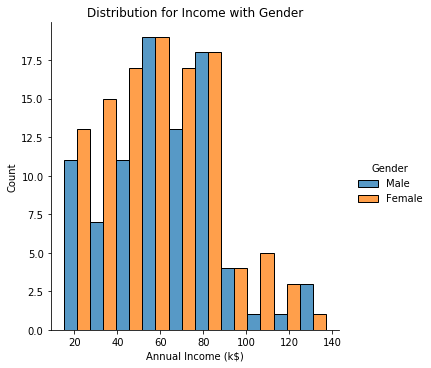

In [14]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", multiple ="dodge")
plt.title("Distribution for Income with Gender")
plt.show()

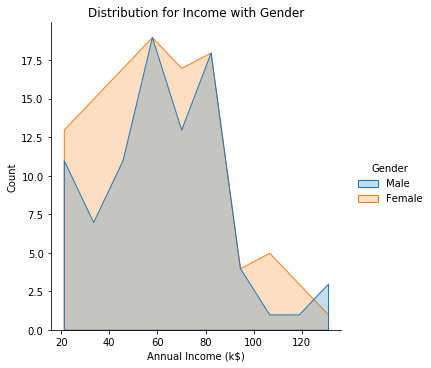

In [15]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", element ="poly")
plt.title("Distribution for Income with Gender")
plt.show()

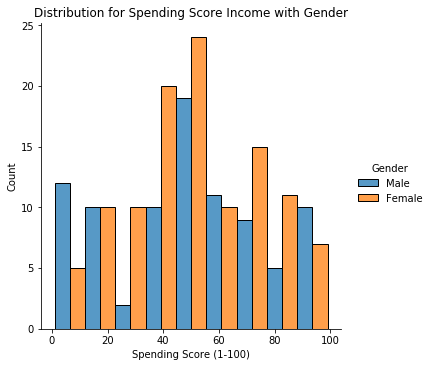

In [16]:
sns.displot(df, x="Spending Score (1-100)", hue="Gender", multiple ="dodge")
plt.title("Distribution for Spending Score Income with Gender")
plt.show()

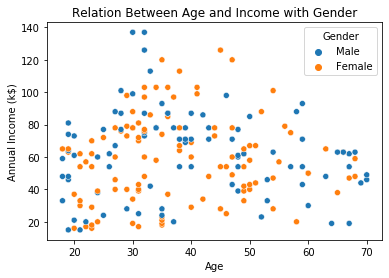

In [17]:
sns.scatterplot(data=df, x="Age",y="Annual Income (k$)", hue="Gender")
plt.title("Relation Between Age and Income with Gender")
plt.show()

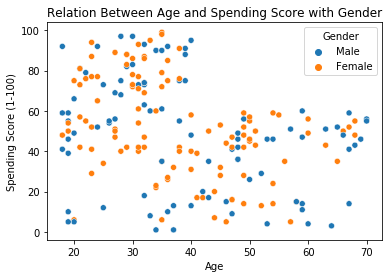

In [18]:
sns.scatterplot(data=df, x="Age",y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Age and Spending Score with Gender")
plt.show()

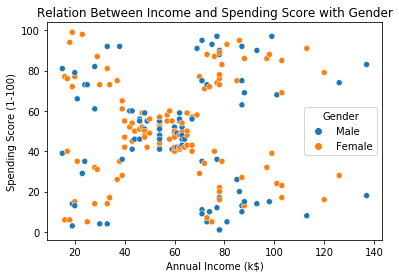

In [19]:
sns.scatterplot(data=df, x="Annual Income (k$)",y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Income and Spending Score with Gender")
plt.show()

#DATA PROCESSING 

In [20]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [21]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [22]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

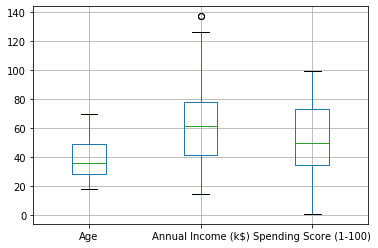

In [23]:
df.boxplot()
plt.show()

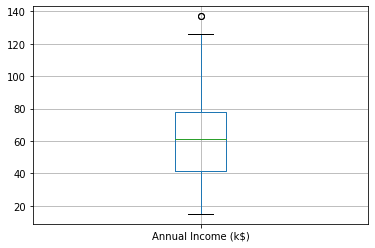

In [24]:
df.boxplot("Annual Income (k$)")
plt.show()

In [25]:
X = df.iloc[: , 2:4] # [ Start_row : stop_row , start_col: stop_col ] 

In [26]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [27]:
%%time

# Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans 
from tqdm import tqdm_notebook as tqdm

K_MAX = 15
wsse = []
# Progress bar
with tqdm(total=K_MAX-1) as pbar:
    for i in range(1,K_MAX):
        
        kmeans = KMeans(n_clusters = i, random_state = 10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 888 ms


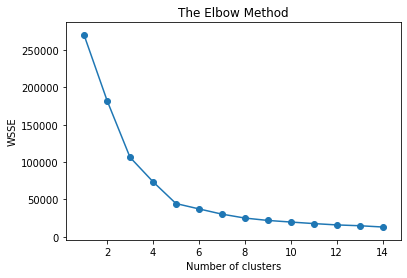

In [28]:
plt.plot(range(1,K_MAX),wsse)
plt.scatter(range(1,K_MAX),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()


In [29]:
print(wsse[4])

44448.45544793371


In [30]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 5 , random_state = 10)
Y_pred = kmeans.fit_predict(X)


In [31]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [32]:
kmeans.n_iter_

3

In [43]:
df["Clusters"]=Y_pred
df.head(12)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


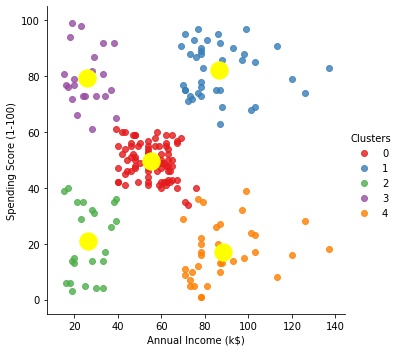

In [44]:
sns.lmplot(data=df,
          x='Annual Income (k$)',
          y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',
           palette='Set1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 300, c = 'yellow')
plt.show()

In [45]:
df['Clusters'] = df.Clusters.map({0: 'Careless', 1: 'Sensible', 2: 'Target', 3: 'Notusefull', 4: 'Careful'})

In [46]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Target
2,Male,21,15,81,Notusefull
3,Female,20,16,6,Target
4,Female,23,16,77,Notusefull
5,Female,31,17,40,Target


In [47]:
df.to_csv(r'targetcustomers.csv',index=True)

In [48]:
dada=pd.read_csv('targetcustomers.csv')